In [1]:
import numpy as np
import pandas as pd
from matplotlib import pylab as plt
import pymc3 as pm

ERROR (theano.gpuarray): pygpu was configured but could not be imported or is too old (version 0.7 or higher required)
NoneType: None


In [2]:
from matplotlib import figure

In [3]:
# import scipy.io

In [4]:
path = 'datos/'
fileName = 'SAOCOM_Chubut_TesisNatyAreasRojas_Agrupamientos_SueloDesnudo-toCsv - SAOCOM_Chubut_TesisNatyAreasRojas_Agrupamientos_SueloDesnudo.csv'

In [5]:
rho_lenga = 930 # [kg/m3] Nothofagus pumilio
rho_nire = 1035 # [kg/m3] Nothofagus antarctica

In [6]:

# C11 = mat['C11mn']#, 'C11std', 
# C12 = 1j*mat['C12imn'] + mat['C12rmn'], #'C12istd','C12rstd', 
# C13 = 1j*mat['C13imn'] + mat['C13rmn'], #'C13istd', 'C13rstd', 
# C22 = mat['C22mn'] #'C22std', 
# C23 = 1j*mat['C23imn'] + mat['C23rmn'], # 'C23istd',  'C23rstd', 
# C33 = mat['C33mn'] #, 'C33std'
# C21 = np.conjugate(C12)
# C31 = np.conjugate(C13)
# C32 = np.conjugate(C23)
# C = np.asarray([[C11, C12, C12], [C21, C22, C23], [C31, C32, C33]])

def dB(x):
    return 10*np.log10(x)

def toPower(x):
    return 10**(x/10)

def anotattedScatter(df, col1, col2):
    ax1 = df.plot.scatter(x=col1,y=col2, figsize=(20, 10), grid=True)
    for i, txt in enumerate(df.NAME):
        striped = txt.split('-')[0]
        ax1.annotate(striped, (df[col1][i], df[col2][i]), xytext=(10,-5), textcoords='offset points',
                        family='sans-serif', fontsize=14, color='darkslategrey')  

def anotattedBubbleScatter(df, col1, col2, col3):
    ax1 = df.plot.scatter(x=col1,y=col2, s=col3, figsize=(20, 10), grid=True)
    for i, txt in enumerate(df.NAME):
        striped = txt.split('-')[0]
        ax1.annotate(striped, (df[col1][i], df[col2][i]), xytext=(10,-5), textcoords='offset points',
                        family='sans-serif', fontsize=14, color='darkslategrey') 

def errorBarPlot(df, col1, col2, col2_std):
    # print(col1, col2, col2_std)
    pos, neg = errorBarL(df, col2, col2_std)
    # print(pos, neg)
    ax1 = df.plot.scatter(x=col1,y=col2, yerr=(pos, neg), alpha=0.7, figsize=(20, 12), grid=True)

    # ax1 = df.plot.scatter(x=col1,y=col2, figsize=(20, 10), grid=True)
    for i, txt in enumerate(df.NAME):
        striped = txt.split('-')[0]
        ax1.annotate(striped, (df[col1][i], df[col2][i]), xytext=(10,-5), textcoords='offset points',
                        family='sans-serif', fontsize=14, color='darkslategrey')


def errorBarL(df, colListMean, colListStd):
    ''' 
    largo barras de error
    '''
    pos = np.abs(dB(1 + (df[colListStd]/toPower(df[colListMean]))))
    neg = np.abs(dB(1 - (df[colListStd]/toPower(df[colListMean]))))

    return pos, neg

In [7]:
data = pd.read_csv(path+fileName, encoding='latin', delimiter = ',') #'\t'

In [8]:
data.head()

,Tipo,Biomasa_nire_m3/ha,Biomasa_total_m3/ha,Bio_nire_std,Bio_total_std,HH_(C11),HV_(C22/2),VV_(C33),ang,NrPix,...,C11_std,C12r_std,C12i_std,C13r_std,C13i_std,C22_std,C23r_std,C23i_std,C33_std,ang_std.1
0,1-nirantal alto,157,163,117.0,117.0,0.134,0.044,0.111,21.0,1186,...,0.053,0.020,0.022,0.028,0.025,0.045,0.017,0.019,0.037,2.6
1,2-nirantal alto,194,221,0.0,0.0,0.128,0.038,0.109,23.9,450,...,0.048,0.020,0.016,0.028,0.019,0.030,0.016,0.013,0.033,3.0
2,3-nirantal interm,92,104,23.0,31.0,0.133,0.035,0.120,20.9,431,...,0.040,0.016,0.014,0.026,0.017,0.026,0.018,0.015,0.036,1.6
3,4-nirantal interme,86,90,0.0,1.0,0.147,0.042,0.111,21.3,678,...,0.068,0.017,0.019,0.038,0.017,0.036,0.013,0.018,0.041,2.5
4,5-nirantal bajo,27,27,10.0,10.0,0.117,0.034,0.109,25.7,282,...,0.052,0.019,0.017,0.041,0.022,0.023,0.013,0.016,0.053,2.7


In [9]:
data.columns

Index(['Tipo', 'Biomasa_nire_m3/ha', 'Biomasa_total_m3/ha', 'Bio_nire_std',
       'Bio_total_std', 'HH_(C11)', 'HV_(C22/2)', 'VV_(C33)', 'ang', 'NrPix',
       'HH_std (C11)', 'HV_std (C22_std/2)', 'VV_std (C33)', 'ang_std', 'NDVI',
       'VV', 'VV_gamma', 'VH', 'VH_gamma', 'LIA', 'NrPix.1', 'VV_std',
       'VV_gamma_std', 'VH_std', 'VH_gamma_std', 'C11', 'C12r', 'C12i', 'C13r',
       'C13i', 'C22', 'C23r', 'C23i', 'C33', 'ang.1', 'C11_std', 'C12r_std',
       'C12i_std', 'C13r_std', 'C13i_std', 'C22_std', 'C23r_std', 'C23i_std',
       'C33_std', 'ang_std.1'],
      dtype='object')

In [10]:
# calculo biomasa
# data['AGB'] = data['Vol m3/ha total']*rho_nire/1000
data['AGB'] = data['Biomasa_total_m3/ha'] #*rho_nire/1000

In [15]:
# rename column
data = data.rename(columns={"Tipo": "NAME"}).copy(deep=True)

In [16]:
# extraigo dataFrame SAOCOM

dataSAOCOM = data[['NAME', 'Biomasa_nire_m3/ha', 'Biomasa_total_m3/ha', 'Bio_nire_std',
       'Bio_total_std', 'AGB', 'C11', 'C12r', 'C12i', 'C13r',
       'C13i', 'C22', 'C23r', 'C23i', 'C33', 'ang.1', 'C11_std', 'C12r_std',
       'C12i_std', 'C13r_std', 'C13i_std', 'C22_std', 'C23r_std', 'C23i_std',
       'C33_std', 'ang_std.1']].copy(deep=True)

In [17]:
# extraigo dataFrame Sentinel

dataSentinelDes = data[['NAME', 'Biomasa_nire_m3/ha', 'Biomasa_total_m3/ha', 'Bio_nire_std',
       'Bio_total_std', 'AGB', 'VV', 'VV_gamma', 'VH', 'VH_gamma', 'LIA', 'NrPix.1', 'VV_std',
       'VV_gamma_std', 'VH_std', 'VH_gamma_std']].copy(deep=True)

In [ ]:
# extraigo dataFrame Sentinel

# dataSentinelDes = data[['NAME', 'FECHA', 'LAYER', 'TIPO_FORES', 'SUP_m2', 'Alt Dom', 'AB',
#        'Vol m3/ha total', 'AGB', 'VV.1','VV (gamma0)', 'VV (beta0)', 'VH.1', 'VH (gamma0)', 'VH (beta0)',
#        'VV_std.1', 'VH_std.1', 'LIA.1', 'PLIA.1', 'IAE.1']].copy(deep=True)

In [18]:
del data

In [ ]:
# calculo biomasa
# data['AGB'] = data['Vol m3/ha total']*rho_nire/1000
# dataSentinelAsc['AGB'] = dataSentinelAsc['Vol m3/ha total']*rho_nire/1000

In [19]:
dataSentinelDes.columns

Index(['NAME', 'Biomasa_nire_m3/ha', 'Biomasa_total_m3/ha', 'Bio_nire_std',
       'Bio_total_std', 'AGB', 'VV', 'VV_gamma', 'VH', 'VH_gamma', 'LIA',
       'NrPix.1', 'VV_std', 'VV_gamma_std', 'VH_std', 'VH_gamma_std'],
      dtype='object')

In [20]:
# normalizacion angulo Sentinel
# 'corrijo' por angulo de incidencia

toAnalize = ['VV', 'VV_gamma', 'VH', 'VH_gamma']
angSentinel = 'LIA'

def angleNormalization(df, colList, ang, sufix):
    for col in colList:
        df[col+sufix] = df[col]*np.cos(40*np.pi/180)/np.cos(df[ang]*np.pi/180)

angleNormalization(dataSentinelDes, toAnalize, angSentinel, '_corr')

In [21]:
# normalizacion angulo SAOCOM
# 'corrijo' por angulo de incidencia

toAnalize =  ['C11', 'C12r', 'C12i', 'C13r', 'C13i', 'C22', 'C23r', 'C23i', 'C33']

angSAOCOM = 'ang.1'


def angleNormalization(df, colList, ang, sufix):
    for col in colList:
        df[col+sufix] = df[col]*np.cos(40*np.pi/180)/np.cos(df[ang]*np.pi/180)

angleNormalization(dataSAOCOM, toAnalize, angSAOCOM, '_corr')

In [22]:
dataSentinelDes.head()

,NAME,Biomasa_nire_m3/ha,Biomasa_total_m3/ha,Bio_nire_std,Bio_total_std,AGB,VV,VV_gamma,VH,VH_gamma,LIA,NrPix.1,VV_std,VV_gamma_std,VH_std,VH_gamma_std,VV_corr,VV_gamma_corr,VH_corr,VH_gamma_corr
0,1-nirantal alto,157,163,117.0,117.0,163,0.120,0.156,0.028,0.036,33.562,734,0.019,0.025,0.004,0.006,0.110316,0.143411,0.025740,0.033095
1,2-nirantal alto,194,221,0.0,0.0,221,0.119,0.154,0.028,0.036,34.593,283,0.017,0.023,0.004,0.005,0.110737,0.143307,0.026056,0.033500
2,3-nirantal interm,92,104,23.0,31.0,104,0.112,0.145,0.030,0.038,32.302,271,0.015,0.020,0.004,0.005,0.101506,0.131414,0.027189,0.034439
3,4-nirantal interme,86,90,0.0,1.0,90,0.123,0.159,0.027,0.035,32.258,422,0.017,0.022,0.005,0.006,0.111421,0.144032,0.024458,0.031705
4,5-nirantal bajo,27,27,10.0,10.0,27,0.118,0.153,0.032,0.041,36.248,175,0.027,0.035,0.008,0.010,0.112086,0.145331,0.030396,0.038945


In [23]:
dataSAOCOM.columns

Index(['NAME', 'Biomasa_nire_m3/ha', 'Biomasa_total_m3/ha', 'Bio_nire_std',
       'Bio_total_std', 'AGB', 'C11', 'C12r', 'C12i', 'C13r', 'C13i', 'C22',
       'C23r', 'C23i', 'C33', 'ang.1', 'C11_std', 'C12r_std', 'C12i_std',
       'C13r_std', 'C13i_std', 'C22_std', 'C23r_std', 'C23i_std', 'C33_std',
       'ang_std.1', 'C11_corr', 'C12r_corr', 'C12i_corr', 'C13r_corr',
       'C13i_corr', 'C22_corr', 'C23r_corr', 'C23i_corr', 'C33_corr'],
      dtype='object')

In [24]:
# largo barras de error

# toErrorBarMean = ['VV.1_corr', 'VV (gamma0)_corr', 'VV (beta0)_corr', 'VH.1_corr', 'VH (gamma0)_corr','VH (beta0)_corr']
# toErrorBarStd = ['VV.1_corr', 'VV (gamma0)_corr', 'VV (beta0)_corr', 'VH.1_corr', 'VH (gamma0)_corr','VH (beta0)_corr']


# def errorBarL(df, colListMean, colListStd):
#     for mean, std in zip(colListMean, colListStd):
        
#         pos = np.abs(dB(1 + (df[std]/df[mean])))
#         neg = np.abs(dB(1 - (df[std]/df[mean])))

#         # pos = np.abs(dB(df[mean]) - dB(df[mean] + df[std]))
#         # neg = np.abs(dB(df[mean]) - dB(df[mean] - df[std]))
        
#         df[mean+'_pos'] = pos 
#         df[mean+'_neg'] = neg 
        
# errorBarL(dataSentinel_AGB, toProcessSentinelMean, toProcessSentinelStd)

In [25]:
# paso a dB Sentinel
# toDBSentinel = ['VV.1_corr', 'VV (gamma0)_corr', 'VV (beta0)_corr', 'VH.1_corr', 'VH (gamma0)_corr','VH (beta0)_corr']
toDBSentinel = ['VV_corr', 'VV_gamma_corr', 'VH_corr', 'VH_gamma_corr']

def newCol(df, colList, sufix):
    for col in colList:
        df[col+sufix] = dB(df[col])

newCol(dataSentinelDes, toDBSentinel, '_dB')

In [26]:
# paso a dB SAOCOM
# toDBSentinel = ['VV.1_corr', 'VV (gamma0)_corr', 'VV (beta0)_corr', 'VH.1_corr', 'VH (gamma0)_corr','VH (beta0)_corr']
toDBSAOCOM = ['C11_corr', 'C22_corr', 'C33_corr']

def newCol(df, colList, sufix):
    for col in colList:
        df[col+sufix] = dB(df[col])

newCol(dataSAOCOM, toDBSAOCOM, '_dB')

In [27]:
dataSentinelDes.columns

Index(['NAME', 'Biomasa_nire_m3/ha', 'Biomasa_total_m3/ha', 'Bio_nire_std',
       'Bio_total_std', 'AGB', 'VV', 'VV_gamma', 'VH', 'VH_gamma', 'LIA',
       'NrPix.1', 'VV_std', 'VV_gamma_std', 'VH_std', 'VH_gamma_std',
       'VV_corr', 'VV_gamma_corr', 'VH_corr', 'VH_gamma_corr', 'VV_corr_dB',
       'VV_gamma_corr_dB', 'VH_corr_dB', 'VH_gamma_corr_dB'],
      dtype='object')

In [28]:
dataSAOCOM.columns

Index(['NAME', 'Biomasa_nire_m3/ha', 'Biomasa_total_m3/ha', 'Bio_nire_std',
       'Bio_total_std', 'AGB', 'C11', 'C12r', 'C12i', 'C13r', 'C13i', 'C22',
       'C23r', 'C23i', 'C33', 'ang.1', 'C11_std', 'C12r_std', 'C12i_std',
       'C13r_std', 'C13i_std', 'C22_std', 'C23r_std', 'C23i_std', 'C33_std',
       'ang_std.1', 'C11_corr', 'C12r_corr', 'C12i_corr', 'C13r_corr',
       'C13i_corr', 'C22_corr', 'C23r_corr', 'C23i_corr', 'C33_corr',
       'C11_corr_dB', 'C22_corr_dB', 'C33_corr_dB'],
      dtype='object')

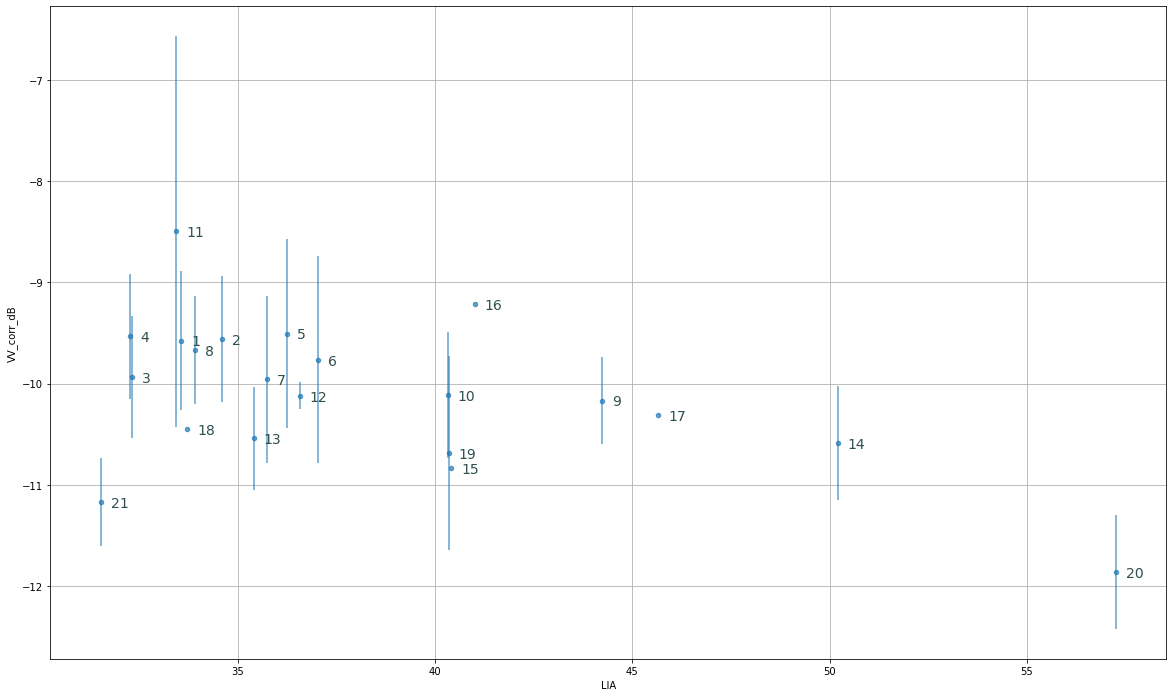

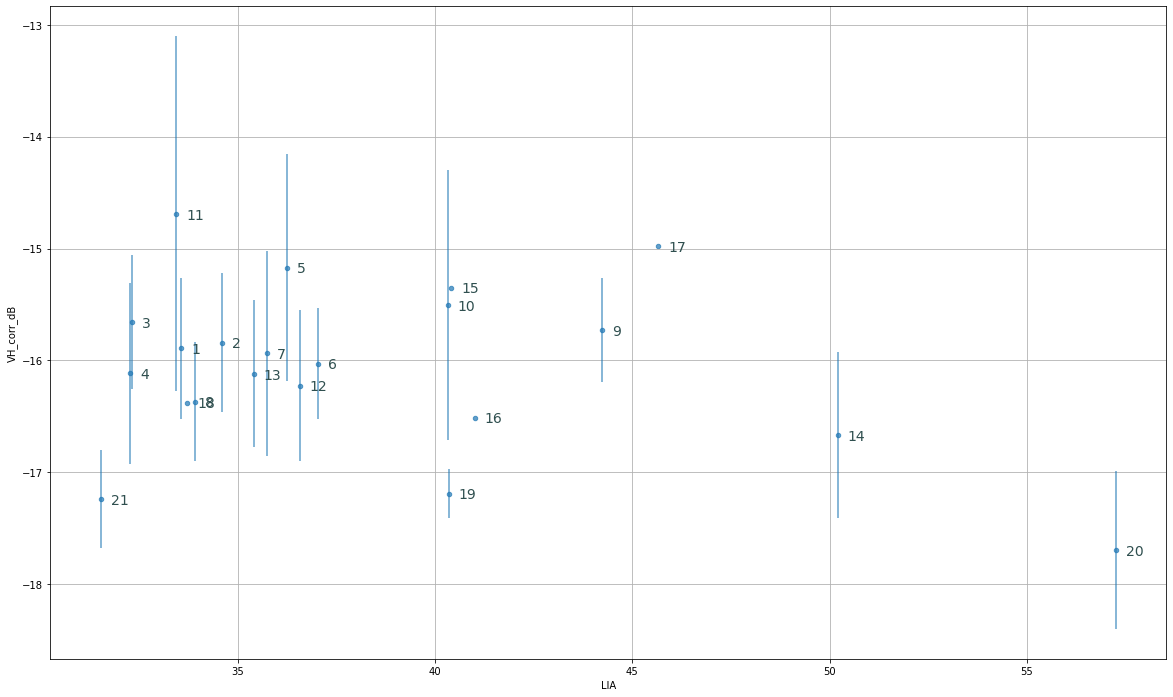

In [29]:
# preliminares Sentinel - estudio angulo de incidencia

toPlot = ['VV_corr_dB', 'VH_corr_dB']
toPlotStd = ['VV_std', 'VH_std']

# toPlot = ['VV.1_corr_dB', 'VH.1_corr_dB']

for mean, std in zip(toPlot, toPlotStd):
    # anotattedScatter(dataSentinelDes, 'LIA.1', figura)
    # print(mean, std)
    errorBarPlot(dataSentinelDes, 'LIA', mean, std)

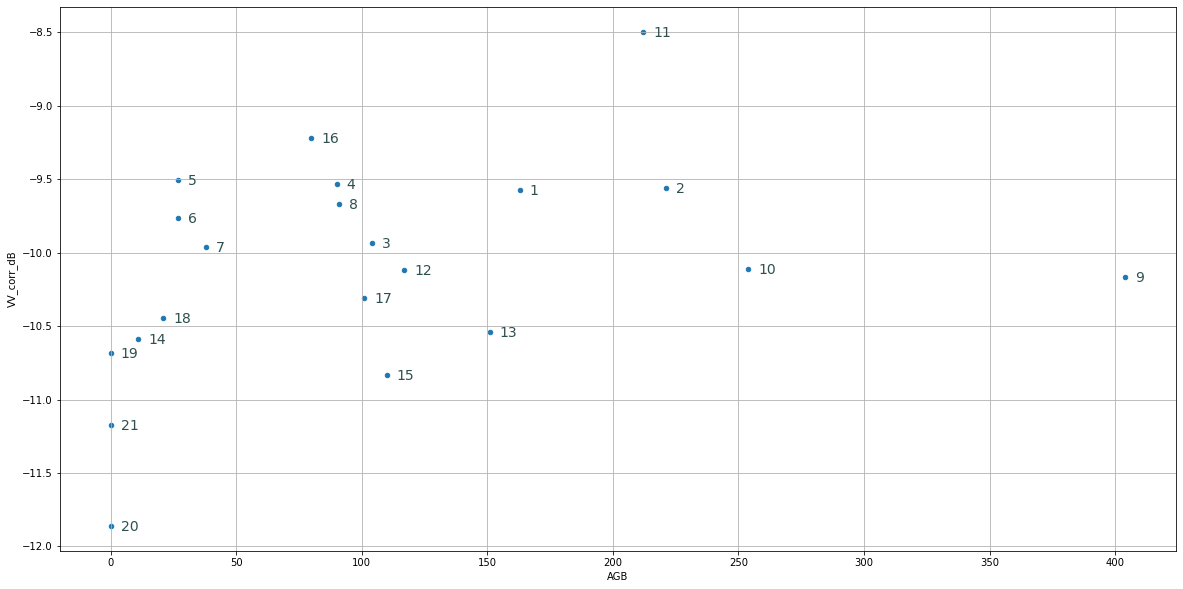

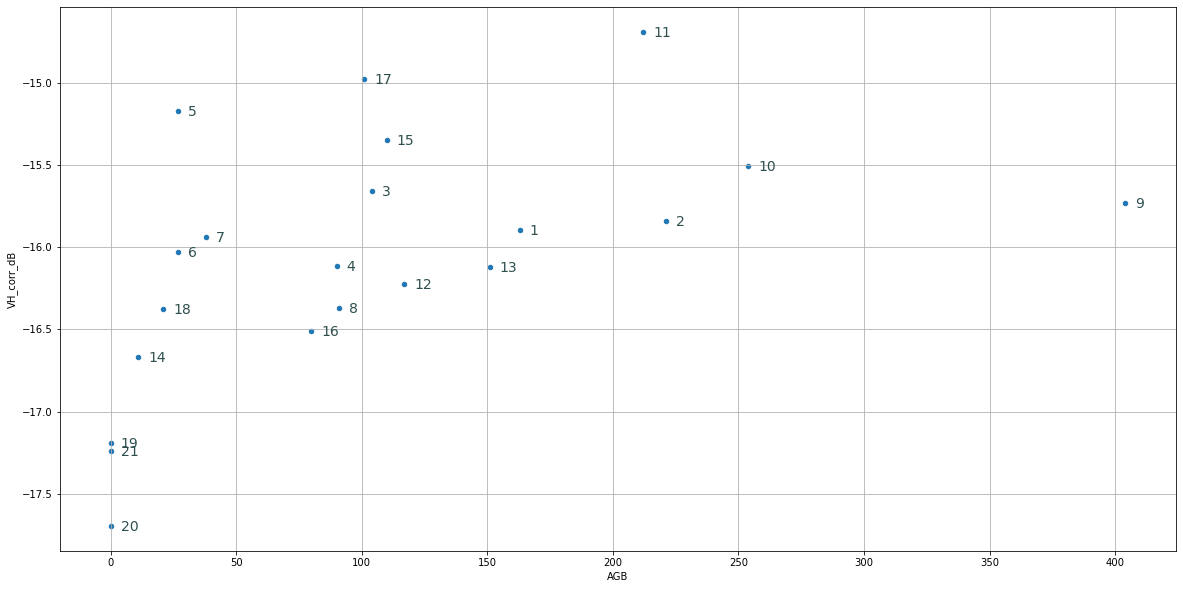

In [30]:
# preliminares Sentinel - estudio Biomasa

toPlot = ['VV_corr_dB', 'VH_corr_dB']

for figura in toPlot:
    anotattedScatter(dataSentinelDes, 'AGB', figura)

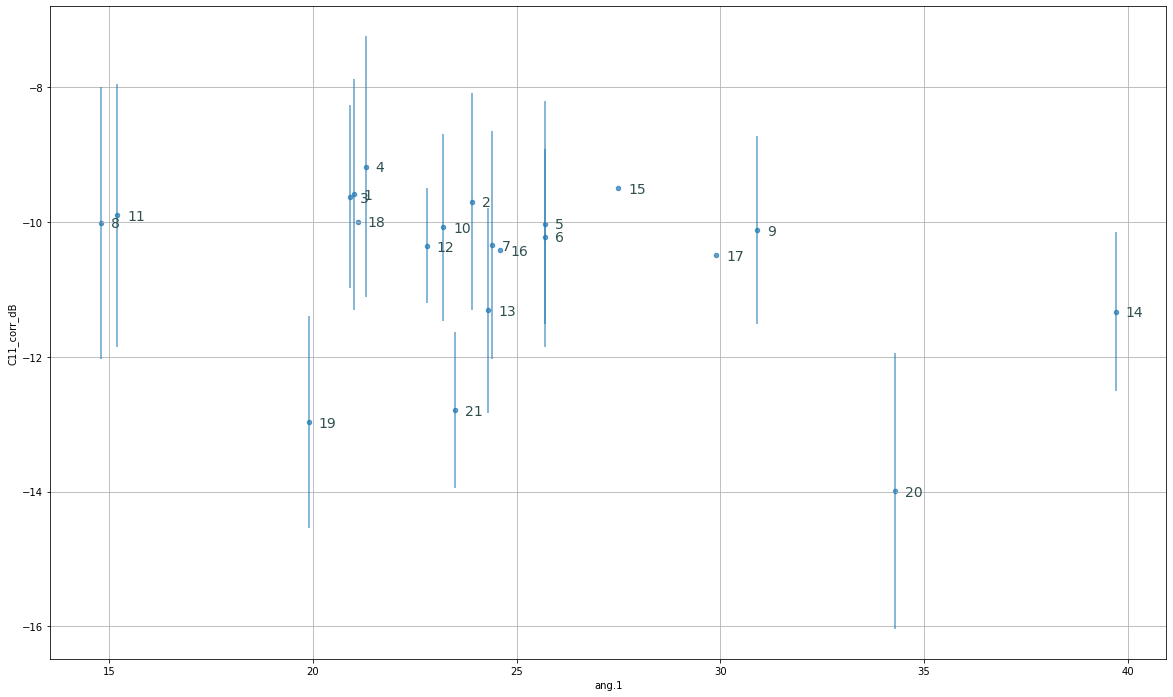

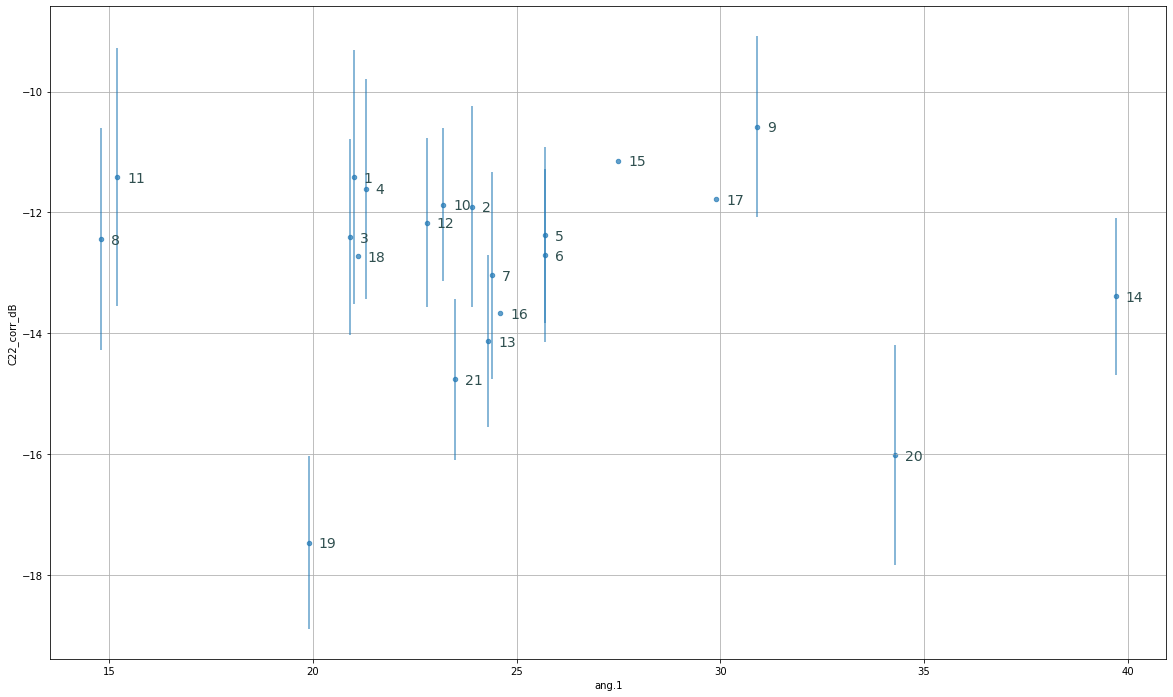

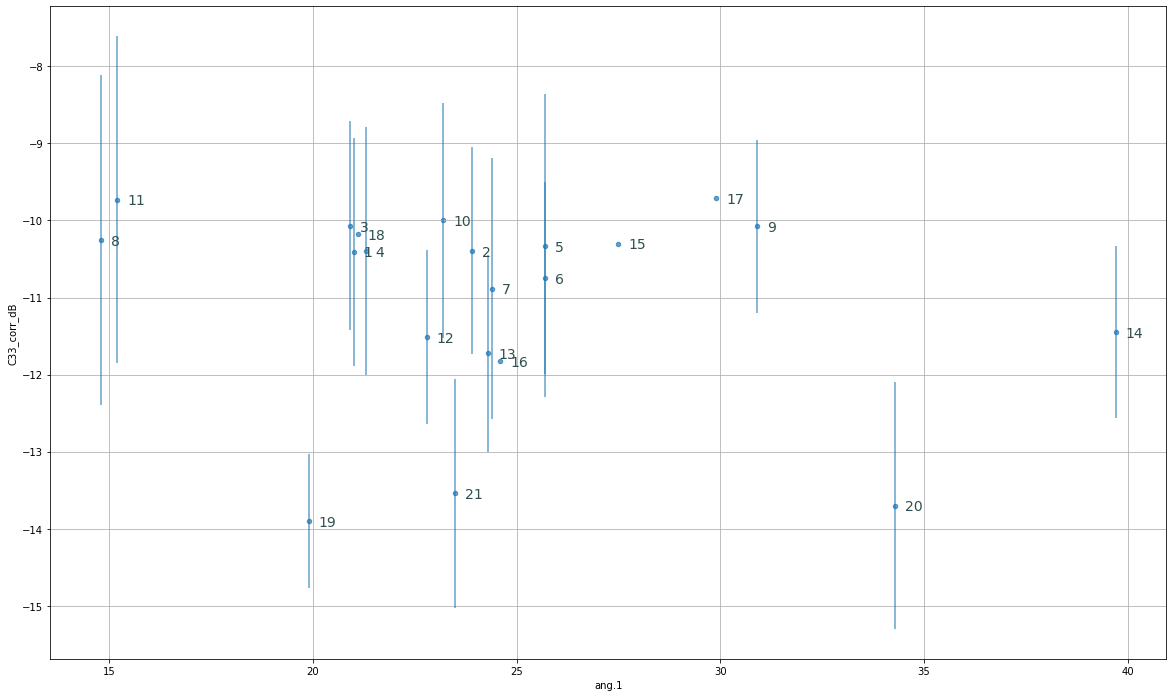

In [31]:
# preliminares SAOCOM - estudio angulo de incidencia

toPlot = ['C11_corr_dB', 'C22_corr_dB', 'C33_corr_dB']
toPlotStd = ['C11_std','C22_std', 'C33_std']

for mean, std in zip(toPlot, toPlotStd):
    # anotattedScatter(dataSentinelDes, 'LIA.1', figura)
    # print(mean, std)
    errorBarPlot(dataSAOCOM, 'ang.1', mean, std)

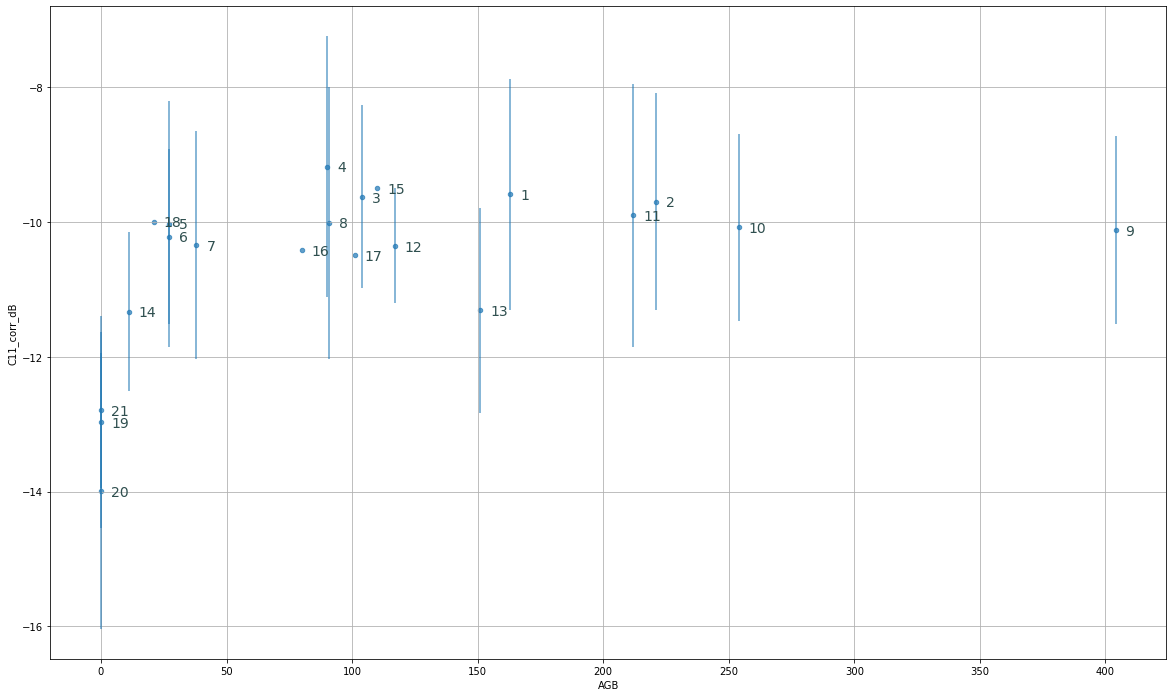

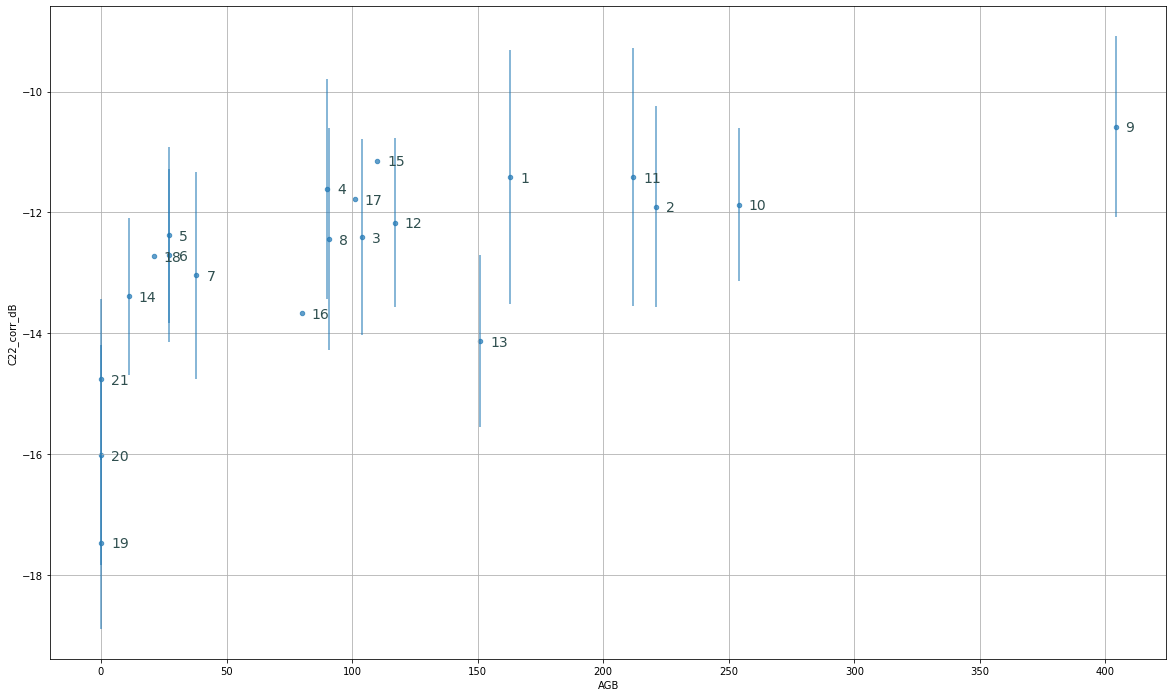

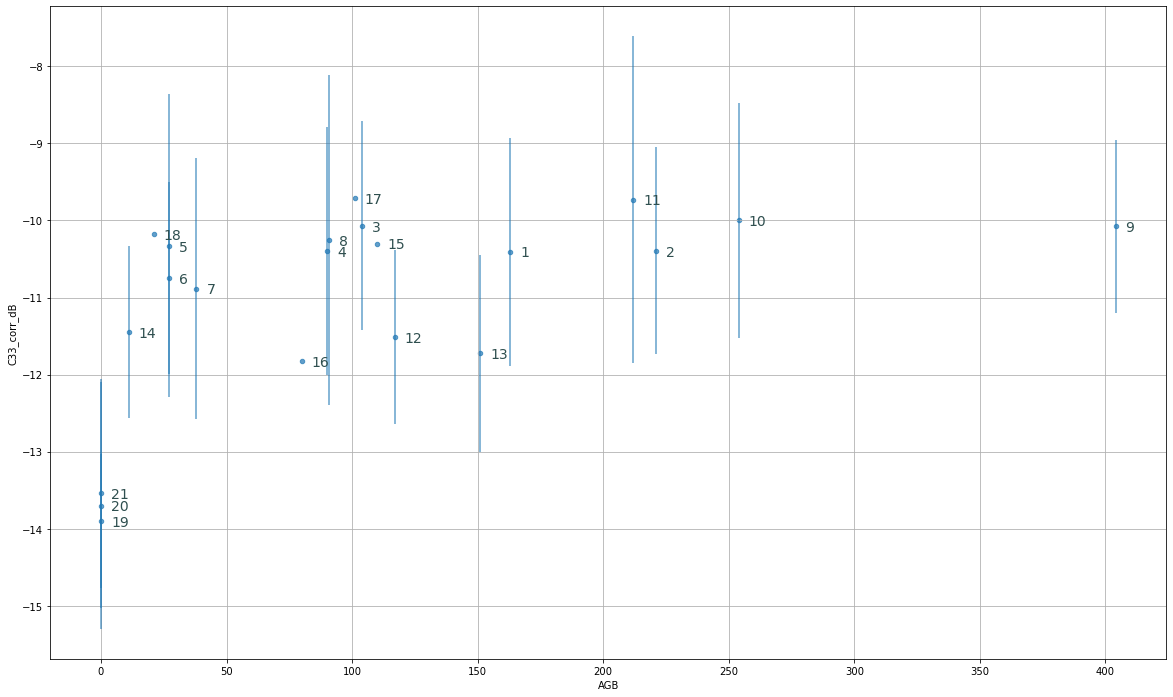

In [32]:
# preliminares SAOCOM - estudio Biomasa

toPlot = ['C11_corr_dB', 'C22_corr_dB', 'C33_corr_dB']
toPlotStd = ['C11_std','C22_std', 'C33_std']

for mean, std in zip(toPlot, toPlotStd):
    # anotattedScatter(dataSentinelDes, 'LIA.1', figura)
    # print(mean, std)
    errorBarPlot(dataSAOCOM, 'AGB', mean, std)

/home/tele/miniconda3/envs/bayes/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


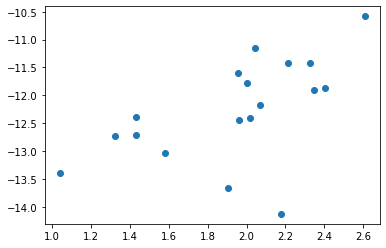

In [74]:
plt.scatter(np.log10(dataSAOCOM.AGB), dataSAOCOM.C22_corr_dB)

In [ ]:
# estudio error

# figure(figsize=(20, 6), dpi=80)

# C11_yerr_pos = np.abs(data_AGB['C11_dB'] - 10*np.log10(data_AGB['C11'] + data_AGB['C11_std']))
# C11_yerr_neg = np.abs(data_AGB['C11_dB'] - 10*np.log10(data_AGB['C11'] - data_AGB['C11_std']))

# # C11_yerr_pos = 1*np.ones(data_AGB.C11.shape)
# # C11_yerr_neg = 5*np.ones(data_AGB.C11.shape)

# plt.errorbar(data_AGB['NAME'], data_AGB['C11_dB'], yerr=(C11_yerr_neg, C11_yerr_pos))
# # plt.xticks(rotation=90)
# # plt.plot(data_AGB['NAME'], data_AGB['C11_dB'])
# # plt.plot(data_AGB['NAME'], C11_yerr_pos)
# plt.xticks(rotation=90)

In [ ]:
# def toProcessGenerator(df):
#     toProcessMean = []
#     toProcessStd = []
#     for col in df.columns:
#         if '_dB' in col:
#             toProcessMean.append(col)
#             stdName = col.split('_')[0]+'_std'
#             toProcessStd.append(stdName)

#     return toProcessMean, toProcessStd

In [ ]:
# toProcessSAOCOMMean, toProcessSAOCOMStd  = toProcessGenerator(data)
# toProcessSentinelMean, toProcessSentinelStd  = toProcessGenerator(dataSentinel)

In [ ]:
# toProcessSAOCOMMean, toProcessSAOCOMStd  = ['C11_corr', 'C22_corr', 'C33_corr'], ['C11_std', 'C22_std', 'C33_std']
# # No hay datos de std para las descending

# toProcessSentinelMean = []
# toProcessSentinelStd = []

In [ ]:
# '''
# toProcessSAOCOMMean, toProcessSAOCOMStd  = toProcessGenerator(data)
# toProcessSentinelMean, toProcessSentinelStd  = toProcessGenerator(dataSentinel)
# '''

# errorBarL(data_AGB, toProcessSAOCOMMean, toProcessSAOCOMStd)

In [ ]:
# data_AGB[['C11_corr_pos', 'C11_corr_neg']]

In [ ]:
# errorBarL(dataSentinel_AGB, toProcessSentinelMean, toProcessSentinelStd)

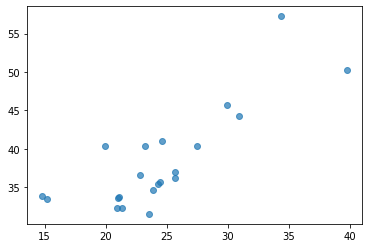

In [33]:
# Estudio angulos SAOCOM vs Sentinel

plt.scatter(dataSAOCOM['ang.1'], dataSentinelDes['LIA'], alpha=0.7) #figsize=(20, 12), grid=True

# for i, txt in enumerate(data_AGB.NAME):
#    striped = txt.split('O')[1]
#    ax.annotate(striped, (data_AGB['ang.1'][i], data_AGB['ang'][i]), xytext=(10,-5), textcoords='offset points',
#                 family='sans-serif', fontsize=14, color='darkslategrey')  

In [ ]:
# Polarimetria

In [34]:
dataSAOCOM.columns

Index(['NAME', 'Biomasa_nire_m3/ha', 'Biomasa_total_m3/ha', 'Bio_nire_std',
       'Bio_total_std', 'AGB', 'C11', 'C12r', 'C12i', 'C13r', 'C13i', 'C22',
       'C23r', 'C23i', 'C33', 'ang.1', 'C11_std', 'C12r_std', 'C12i_std',
       'C13r_std', 'C13i_std', 'C22_std', 'C23r_std', 'C23i_std', 'C33_std',
       'ang_std.1', 'C11_corr', 'C12r_corr', 'C12i_corr', 'C13r_corr',
       'C13i_corr', 'C22_corr', 'C23r_corr', 'C23i_corr', 'C33_corr',
       'C11_corr_dB', 'C22_corr_dB', 'C33_corr_dB'],
      dtype='object')

In [35]:
C11 = dataSAOCOM['C11_corr'].values#, 'C11std', 
C12 = 1j*dataSAOCOM['C12i_corr'].values + dataSAOCOM['C12r_corr'].values #'C12istd','C12rstd', 
C13 = 1j*dataSAOCOM['C13i_corr'].values + dataSAOCOM['C13r_corr'].values #'C13istd', 'C13rstd', 
C22 = dataSAOCOM['C22_corr'].values #'C22std', 
C23 = 1j*dataSAOCOM['C23i_corr'].values + dataSAOCOM['C23r_corr'].values # 'C23istd',  'C23rstd', 
C33 = dataSAOCOM['C33_corr'].values #, 'C33std'
C21 = np.conjugate(C12)
C31 = np.conjugate(C13)
C32 = np.conjugate(C23)
C = np.asarray([[C11, C12, C13], [C21, C22, C23], [C31, C32, C33]])

In [36]:
Q = np.zeros((C.shape[2],3,3), dtype=complex)

for i in range(C.shape[2]):
    Q[i,:,:] = C[:,:,i]
    
# list(C.reshape((54, 3, 3)))

In [ ]:
# for i in range(C.shape[2]):
#     print(C[:,:,i] == Q[i,:,:])

# testeo parte imag C12
# Q_ = C.reshape((54, 3, 3), order='C')

# for i in range(3):
#     for j in range(3):
#         print(C[0,1,:] == Q_[:,i,j])

# type(Q_) == type(C)

# C_ = C.reshape((54,3,3))
# T = np.zeros(C_.shape, dtype = complex)
# for parcela in range(T.shape[0]):
#     T[parcela,:,:] = CaT(C_[parcela,:,:])

In [37]:
dataSAOCOM['C'] = list(Q)

In [38]:
dataSAOCOM.columns

Index(['NAME', 'Biomasa_nire_m3/ha', 'Biomasa_total_m3/ha', 'Bio_nire_std',
       'Bio_total_std', 'AGB', 'C11', 'C12r', 'C12i', 'C13r', 'C13i', 'C22',
       'C23r', 'C23i', 'C33', 'ang.1', 'C11_std', 'C12r_std', 'C12i_std',
       'C13r_std', 'C13i_std', 'C22_std', 'C23r_std', 'C23i_std', 'C33_std',
       'ang_std.1', 'C11_corr', 'C12r_corr', 'C12i_corr', 'C13r_corr',
       'C13i_corr', 'C22_corr', 'C23r_corr', 'C23i_corr', 'C33_corr',
       'C11_corr_dB', 'C22_corr_dB', 'C33_corr_dB', 'C'],
      dtype='object')

In [ ]:
# df = pd.DataFrame({"A":[3,4],"B":[5,6],"C":[7,8]}, index=["a","b"])
# df
# df['otraMas'] = [[1,2], [3,4]]
# df['ultima'] = [[[1,2],[1,2]], [[3,4],[3,4]]]
# cacona = [[[1,2],[1,2]], [[3,4],[3,4]]]
# df['mas'] = cacona


In [39]:
dataSAOCOM['C'][0]

array([[0.10995299+0.j        , 0.00082054+0.00246163j,
        0.02953961-0.00328218j],
       [0.00082054-0.00246163j, 0.07220793+0.j        ,
        0.        +0.00164109j],
       [0.02953961+0.00328218j, 0.        -0.00164109j,
        0.09108046+0.j        ]])

In [40]:
def CaT(C):
    '''
    Pasa de Matriz C a Matriz T.
    Toma como entrada una matriz de 3x3
    '''
    # print(C)
    T = np.zeros((3,3), dtype = complex)
    T[0,0] = C[0,0] + C[2,2] + 2*np.real(C[0,2])
    T[0,1] = C[0,0] - C[2,2] - 2j*np.imag(C[0,2])
    T[0,2] = np.sqrt(2)*(C[0,1] + C[2,1])
    T[1,0] = np.conjugate(T[0,1])
    T[1,1] = C[0,0] + C[2,2] - 2*np.real(C[0,2])
    T[1,2] = np.sqrt(2)*(C[0,1] - C[2,1])
    T[2,0] = np.conjugate(T[0,2])
    T[2,1] = np.conjugate(T[1,2])
    T[2,2] = 2*C[1,1]
    return T

In [41]:
dataSAOCOM['T'] = dataSAOCOM['C'].apply(lambda row: CaT(row)) #axis=1

In [ ]:
# Prueba matriz CaT
# Cprueba = C[:,:,10]
# print(Cprueba)
# print(np.around(CaT(Cprueba), 4))


In [ ]:
# dataSAOCOM.to_csv('datosViejosMati.csv')

In [ ]:
# cuca = pd.read_csv('datosViejosMati.csv', encoding='latin', delimiter = ',')

In [ ]:
# cuca.head

In [58]:
# Indicadores que dependen de T

def H(M):
    '''
    calcula Entropia polarimetrica H
    '''
    d,V = np.linalg.eig(M)
   
    #l = np.zeros(3)
    autval = np.zeros(3)
    prb = np.zeros(3)
   
    for k in range(0,2):
        #l[k] = d[k]
#         if l[k] < 0.00001:
#             l[k]=0
        autval[k] = (np.real(d[k]))
    for k in range(0,2):
        prb[k] = autval[k]/sum(autval)

    #calculo de H
    res = 0
    for i in range(0,2):
            if not prb[i] == 0:
                res = res - prb[i]*np.log10(prb[i])/np.log10(3)
    return res

def alfa(M):
    '''
    calcula el angulo alfa polarimetrico alfa
    '''
    d,V = np.linalg.eig(M)
    idx = d.argsort()[::-1] #ordeno los autovalores de forma descendente
   
    l = np.real(d[idx])
    V = V[:,idx]
   
    # Independent target decomposition (T3 seen as the sum of three independent targets represented by a single scattering matrix T3li, i=1,2,3)
#     T3l1 = d[0]*V[:,0]*V[:,0].T
#     T3l2 = d[1]*V[:,1]*V[:,1].T
#     T3l3 = d[2]*V[:,2]*V[:,2].T

    # Target vector associated to max value eigenvalue l1
#     k1 = np.sqrt(d[0])*V[:,0]
#     kAbs = abs(k1)
#     kAngle = angle(k1)
#     k1 = kAbs*exp(1j*kAngle) # notacion exponencial siguiendo ec. 7.4
    p = np.zeros(3)
    alpha = np.zeros(3)
   
    for i in range(0,2):
        p[i] = l[i]/sum(l) #ordenados de mayor a menor probabilidad
        alpha[i] = np.arccos(abs(V[i,0]))*180/np.pi # Given the revised parameterization of the 3x3 U3 matrix (see 7.6, pag. 231, Lee-Pottier)

    alpha0 = sum(alpha*p)   # promedio de los alpha

#     A = (l(1)-l(2))/(l(1)+l(2)) # Anisotropia
#     alpha1 = alpha(0) # el alpha dominante (el que tiene la probabilidad mas grande)
#     alpha2 = alpha(1) # el segundo alpha (el que tiene la probabilidad intermedia)
#     alpha3 = alpha(2) # el alpha marginal (el que tiene la probabilidad mas baja)
   
    return alpha0

def anisotropy(M):
    '''
    calcula la anisotropia polarimetrica A
    '''
    d,V = np.linalg.eig(M)
    autoval = np.real(d)       
    L = np.sort(autoval) # los ordena de menor a mayor: L[0]<L[1]<L[2]
   
    return (L[1]-L[0])/(L[1]+L[0]) #(L[2]-L[1])/(L[2]+L[1])#,(L[1]-L[0])/(L[1]+L[0]), L[0]/L[2]]

def anisotropiaDeFranco(M):
    '''
    calcula la anisotropia polarimetrica A
    '''
    d,V = np.linalg.eig(M)
    autoval = np.real(d)       
    L = np.sort(autoval) # los ordena de menor a mayor: L[0]<L[1]<L[2]
   
    return (L[2]-L[1])/(L[2]+L[1]) #(L[2]-L[1])/(L[2]+L[1])#,(L[1]-L[0])/(L[1]+L[0]), L[0]/L[2]]


def copol_par(M):
    '''
    parámetro de co-polarización
    '''
   
    return np.real(M[0,0]/M[1,1])

def geom_intens(M):
    '''
    intensidad geométrica
    '''
    return abs(np.linalg.det(M))**(1/3)

def diffFaseCopol(M):
    '''
    Diferencia de fase copol
    '''
    return np.rad2deg(np.arctan2(-0.5*np.imag(M[0,1]), 0.25*np.real((M[0,0]-M[1,1]))))

def alturaPedestal(M):
    '''
    calcula la altura pedesta
    '''
    d,V = np.linalg.eig(M)
    autoval = np.real(d)
    L = np.sort(autoval) # los ordena de menor a mayor: L[0]<L[1]<L[2]
   
    return L[0]/L[2] #(L[2]-L[1])/(L[2]+L[1])#,(L[1]-L[0])/(L[1]+L[0]), L[0]/L[2]]

def absHHVV(M):
    '''
    calcula abs HHVV
    '''
    r = 0.25*(M[0,0] - M[1,1])
    i = -0.5*np.imag(M[0,1])
    return np.sqrt(np.real(r**2+i**2)) #(L[2]-L[1])/(L[2]+L[1])#,(L[1]-L[0])/(L[1]+L[0]), L[0]/L[2]]

In [43]:
# Indicadores que dependen de C

def corrCopol(M):
    '''
    correlacion canales copol. Pensamos que tiene a cero si la diferencia de fase es 90 deg. 
    Si la diferencia de fase es 0 o 180, corrCopol tiende a 1. 
    '''
    return np.abs(M[0,2]/np.sqrt(M[0,0]*M[2,2]))

def factorConformidad(M):
    '''
    factor de conformidad
    '''
    return np.real((2*np.real(M[0,2])-0.5*M[1,1])/(M[0,0]+M[1,1]+M[2,2]))

def gamma(M):
    '''
    cociente canales copol
    '''
    return np.real(M[0,0]/M[2,2])


In [44]:
# Prueba matriz CaT
Cprueba = C[:,:,5]
T = CaT(Cprueba)
print(Cprueba)
print(T)

[[0.09521603+0.j         0.00510086+0.00510086j 0.03655615+0.00085014j]
 [0.00510086-0.00510086j 0.05355902+0.j         0.00085014-0.00255043j]
 [0.03655615-0.00085014j 0.00085014+0.00255043j 0.08416417+0.j        ]]
[[0.25249251+0.j         0.01105186-0.00170029j 0.00841599+0.01082056j]
 [0.01105186+0.00170029j 0.10626789+0.j         0.00601142+0.00360685j]
 [0.00841599-0.01082056j 0.00601142-0.00360685j 0.10711803+0.j        ]]


In [59]:
print('H: '+str(H(T)))
print('Alfa: '+str(alfa(T)))
print('A: '+str(anisotropy(T)))
print('p-copol: '+str(copol_par(T)))
print('geom_intens: '+str(geom_intens(T)))
print('diffFaseCopol: '+str(diffFaseCopol(T)))
print('alturaPedestal: '+str(alturaPedestal(T)))
print('absHHVV: '+str(absHHVV(T)))
print('corrCopol: '+str(corrCopol(Cprueba)))
print('factorConformidad: '+str(factorConformidad(Cprueba)))
print('gamma: '+str(gamma(Cprueba)))

H: 0.5596957101274007
Alfa: 24.378017177984937
A: 0.05763890702813291
p-copol: 2.376
geom_intens: 0.14145199634659625
diffFaseCopol: 1.332219853869639
alturaPedestal: 0.3906742796445275
absHHVV: 0.03656603882235978
corrCopol: 0.40846914430228615
factorConformidad: 0.19890510948905113
gamma: 1.1313131313131313


In [ ]:
# H_ = np.zeros(T.shape[0])
# for parcela in range(T.shape[0]):
#     H_[parcela] = H(T[parcela,:,:])

In [60]:
# batch polarimetrico

dataSAOCOM['H'] = dataSAOCOM['T'].apply(lambda row: H(row))
dataSAOCOM['Alfa'] = dataSAOCOM['T'].apply(lambda row: alfa(row))
dataSAOCOM['A'] = dataSAOCOM['T'].apply(lambda row: anisotropy(row))
dataSAOCOM['AFranco'] = dataSAOCOM['T'].apply(lambda row: anisotropiaDeFranco(row))
dataSAOCOM['p-copol'] = dataSAOCOM['T'].apply(lambda row: copol_par(row))
dataSAOCOM['geom_intens'] = dataSAOCOM['T'].apply(lambda row: geom_intens(row))
dataSAOCOM['diffFaseCopol'] = dataSAOCOM['T'].apply(lambda row: diffFaseCopol(row))
dataSAOCOM['alturaPedestal'] = dataSAOCOM['T'].apply(lambda row: alturaPedestal(row))
dataSAOCOM['absHHVV'] = dataSAOCOM['T'].apply(lambda row: absHHVV(row))
dataSAOCOM['corrCopol'] = dataSAOCOM['C'].apply(lambda row: corrCopol(row))
dataSAOCOM['factorConformidad'] = dataSAOCOM['C'].apply(lambda row: factorConformidad(row))
dataSAOCOM['gamma'] = dataSAOCOM['C'].apply(lambda row: gamma(row))

In [61]:
dataSAOCOM[['H','Alfa','A']].head()

,H,Alfa,A
0,0.582942,26.370612,0.044915
1,0.586411,27.248857,0.070704
2,0.543138,26.710326,0.130617
3,0.546665,25.547059,0.073286
4,0.571356,25.723000,0.083775


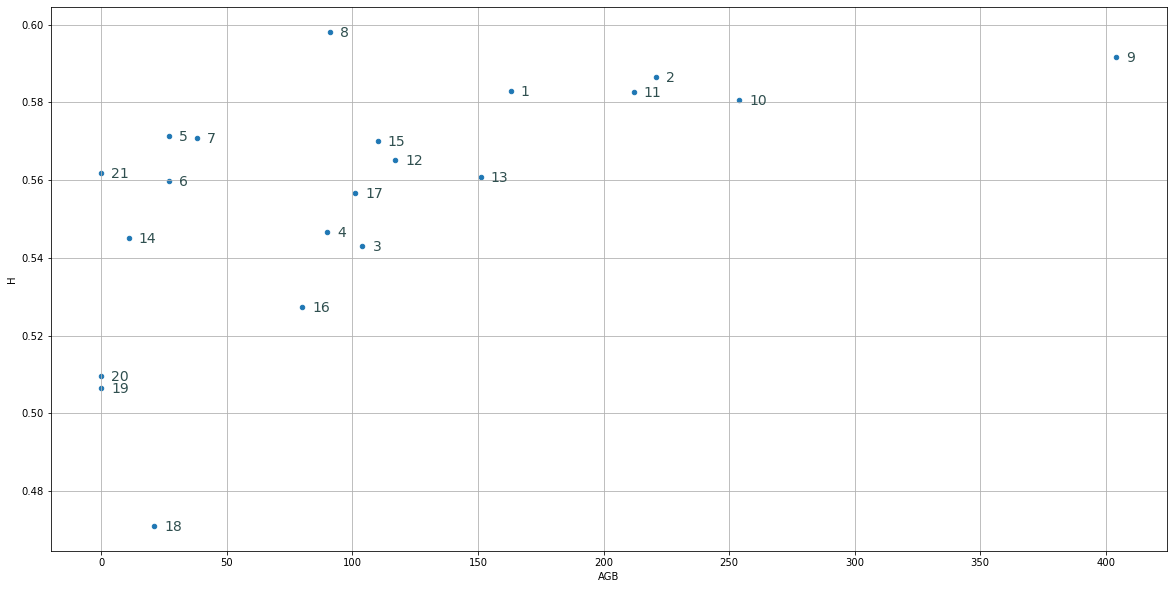

In [48]:
# Estudio intro polarimetrico

anotattedScatter(dataSAOCOM, 'AGB', 'H')

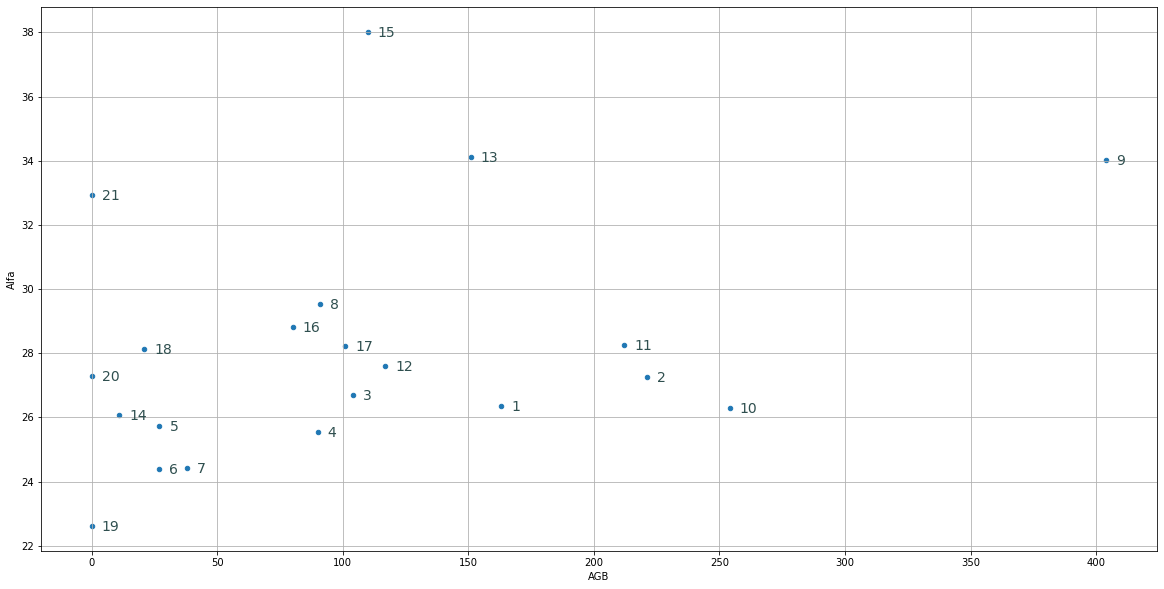

In [49]:
anotattedScatter(dataSAOCOM, 'AGB', 'Alfa')

# plt.scatter(dataSAOCOM['AGB'], dataSAOCOM['Alfa'])
# plt.ylim([0, 90])

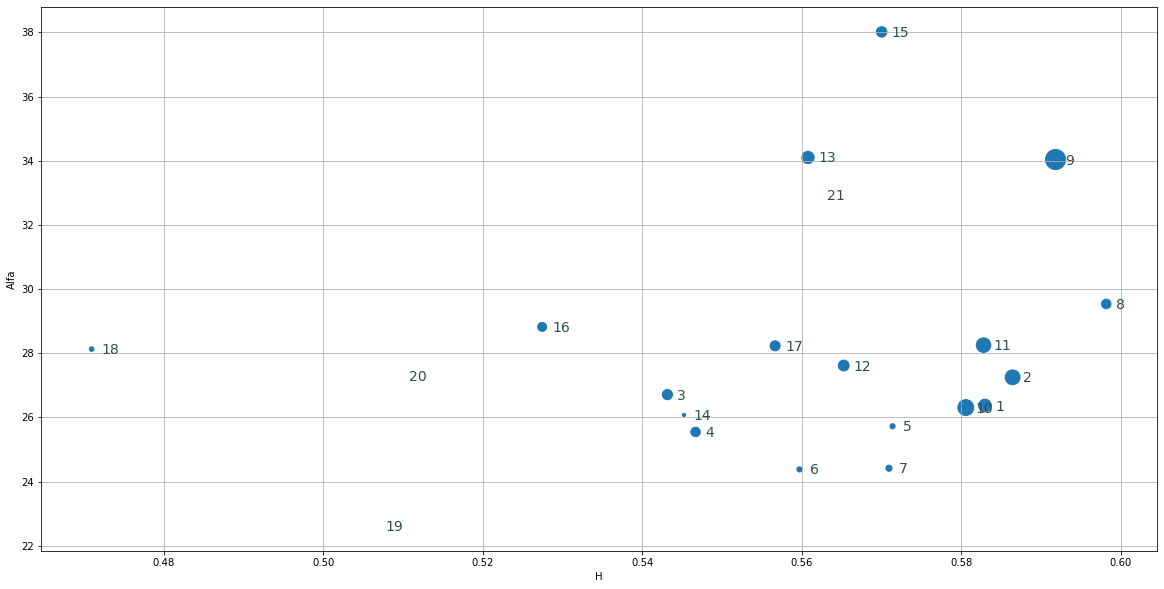

In [50]:
# anotattedScatter(dataSAOCOM, 'H', 'Alfa')


anotattedBubbleScatter(dataSAOCOM, 'H', 'Alfa', 'AGB')

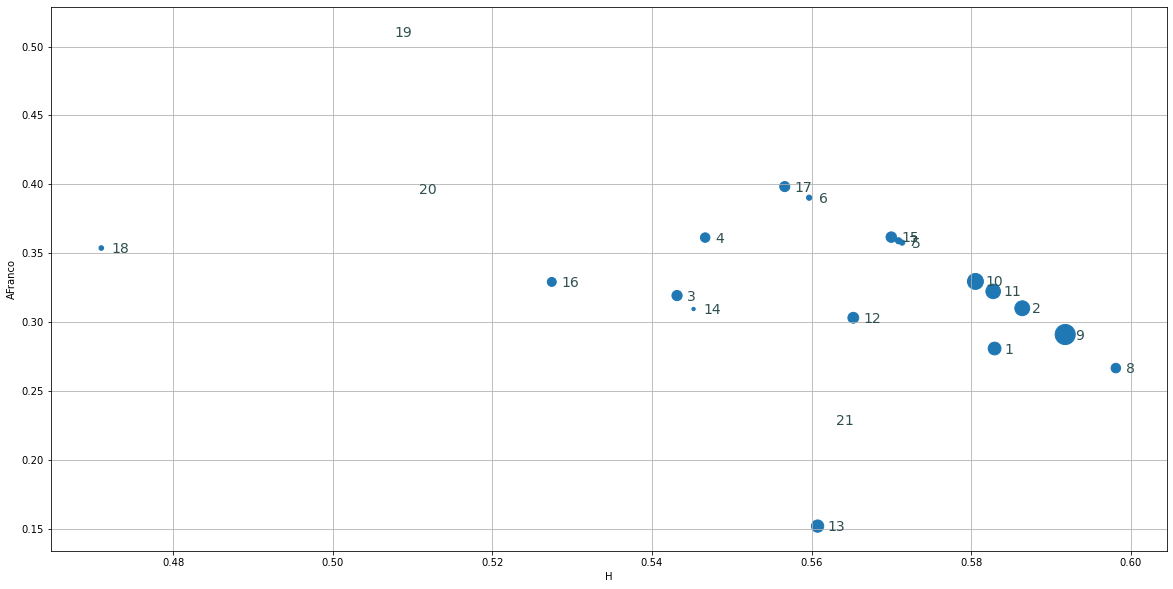

In [62]:
anotattedBubbleScatter(dataSAOCOM, 'H', 'AFranco', 'AGB')

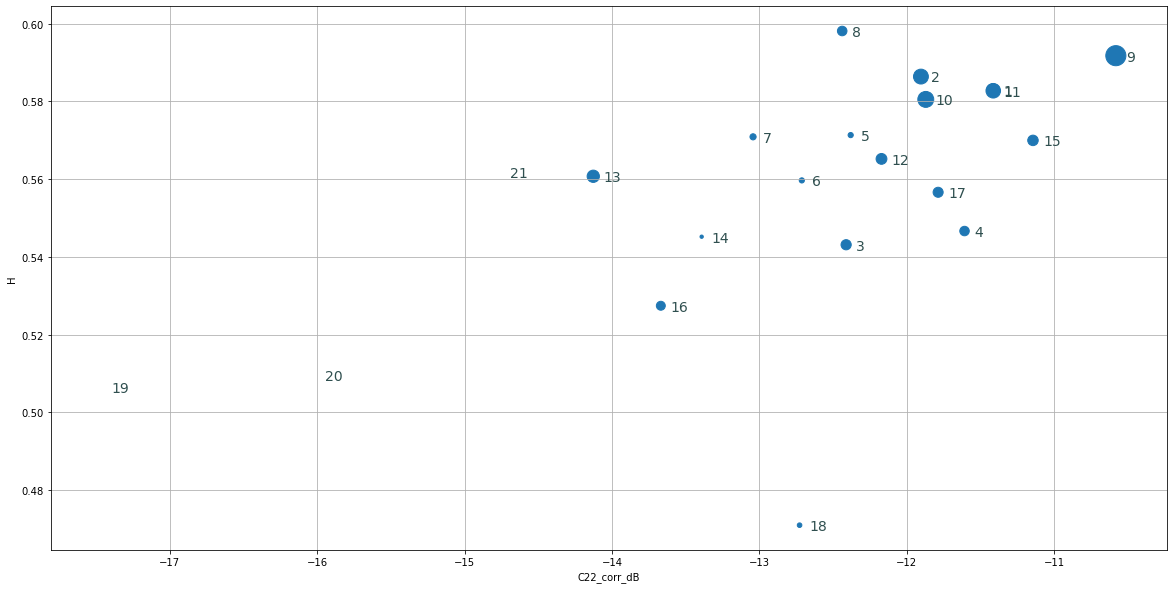

In [69]:
anotattedBubbleScatter(dataSAOCOM, 'C22_corr_dB', 'H', 'AGB')

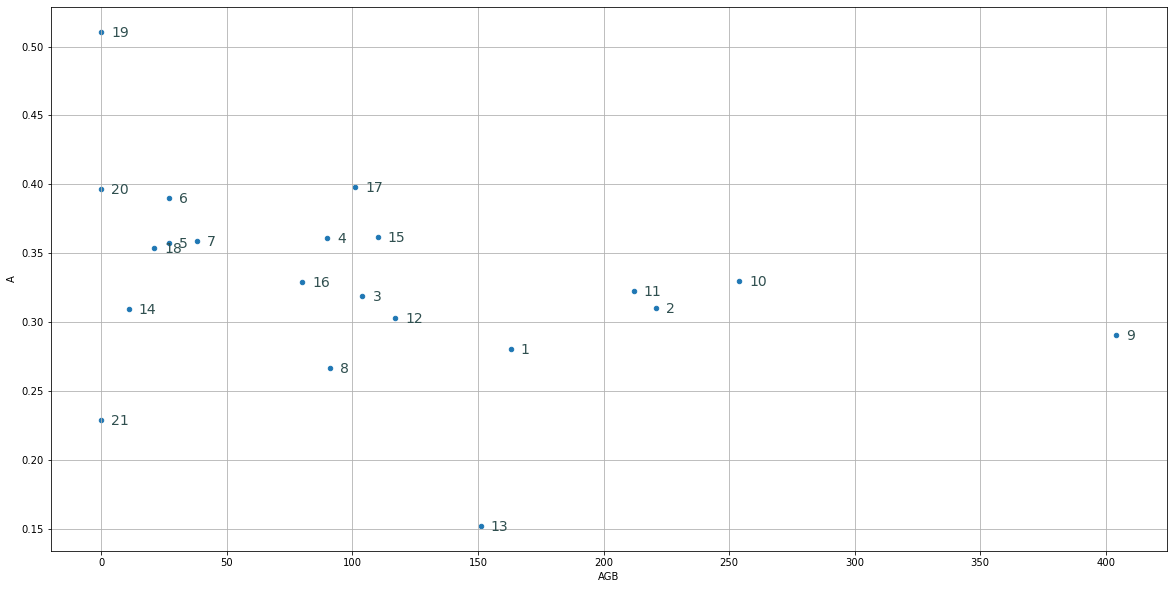

In [51]:
anotattedScatter(dataSAOCOM, 'AGB', 'A')

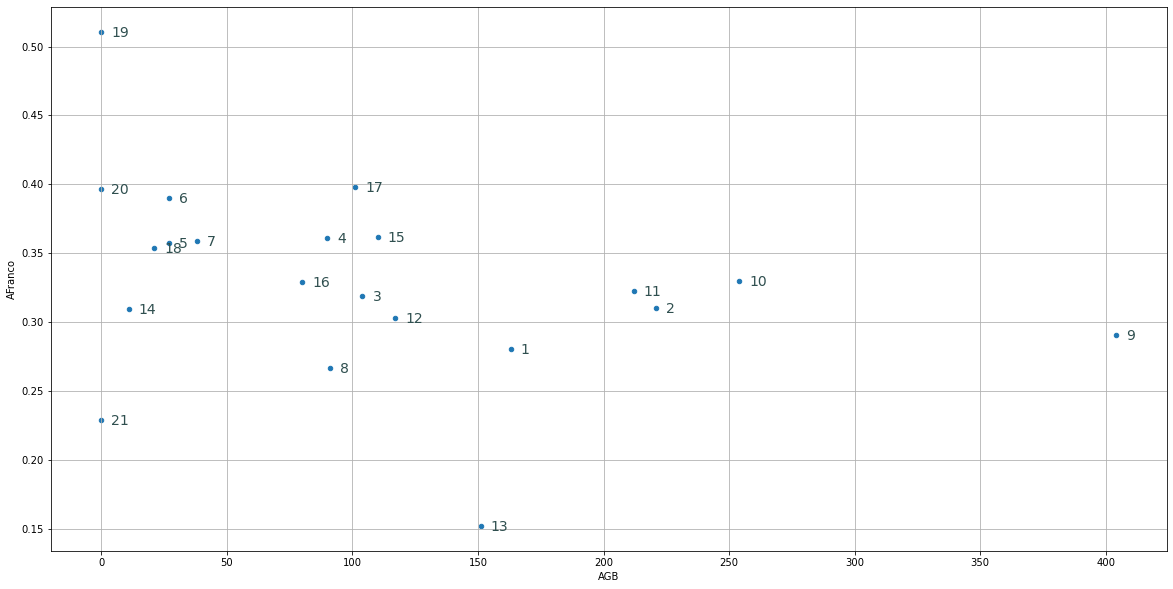

In [75]:
anotattedScatter(dataSAOCOM, 'AGB', 'AFranco')

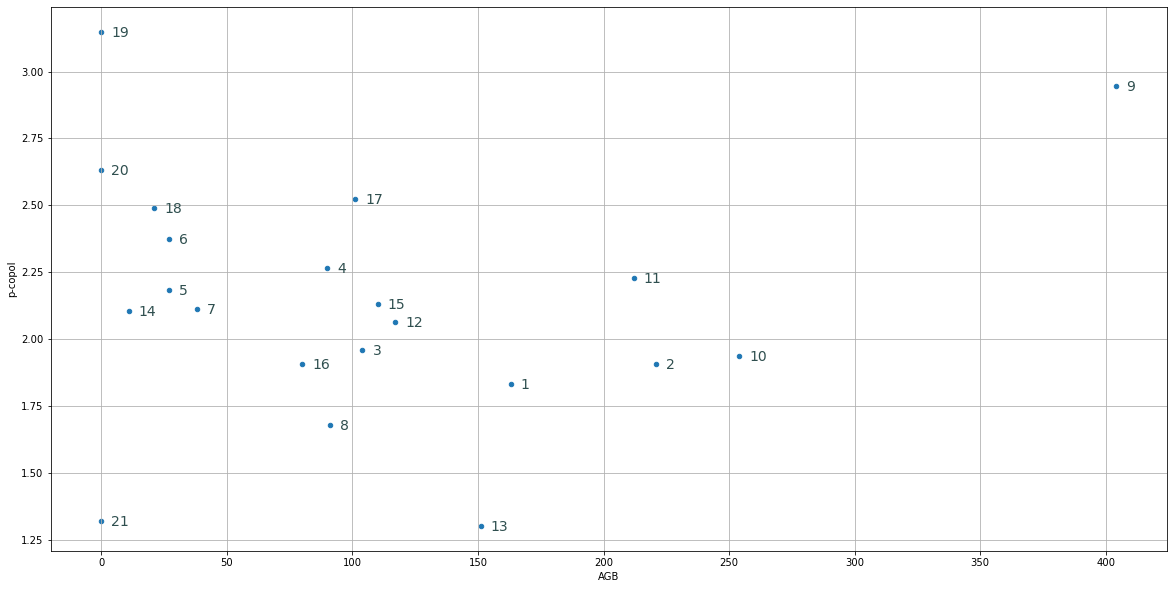

In [52]:
anotattedScatter(dataSAOCOM, 'AGB', 'p-copol')

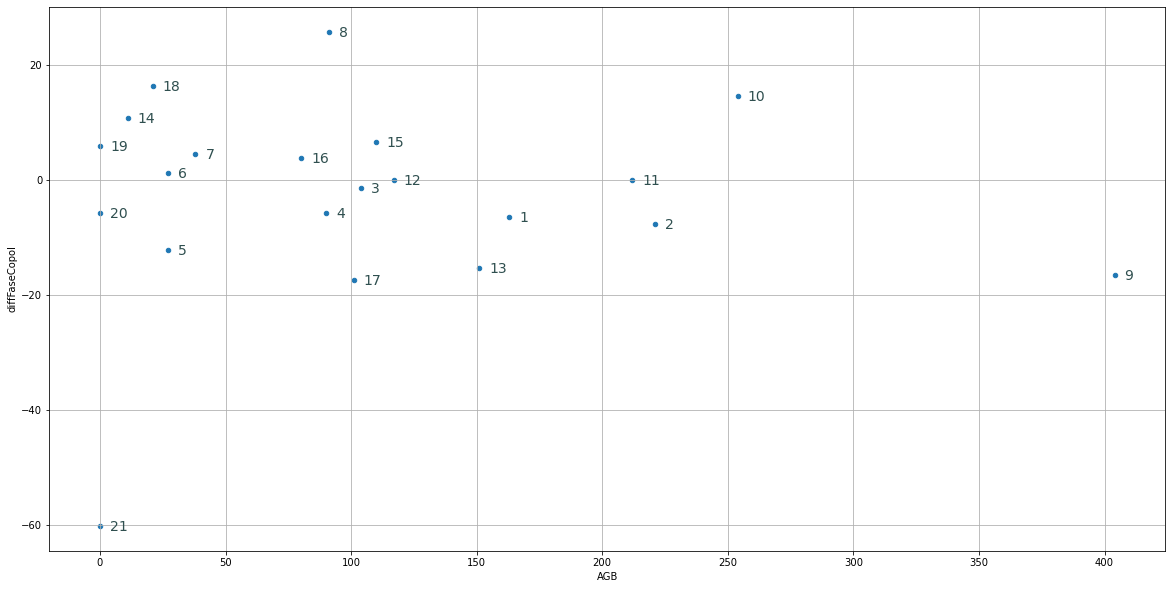

In [53]:
anotattedScatter(dataSAOCOM, 'AGB', 'diffFaseCopol')
# dataSAOCOM['diffFaseCopol']

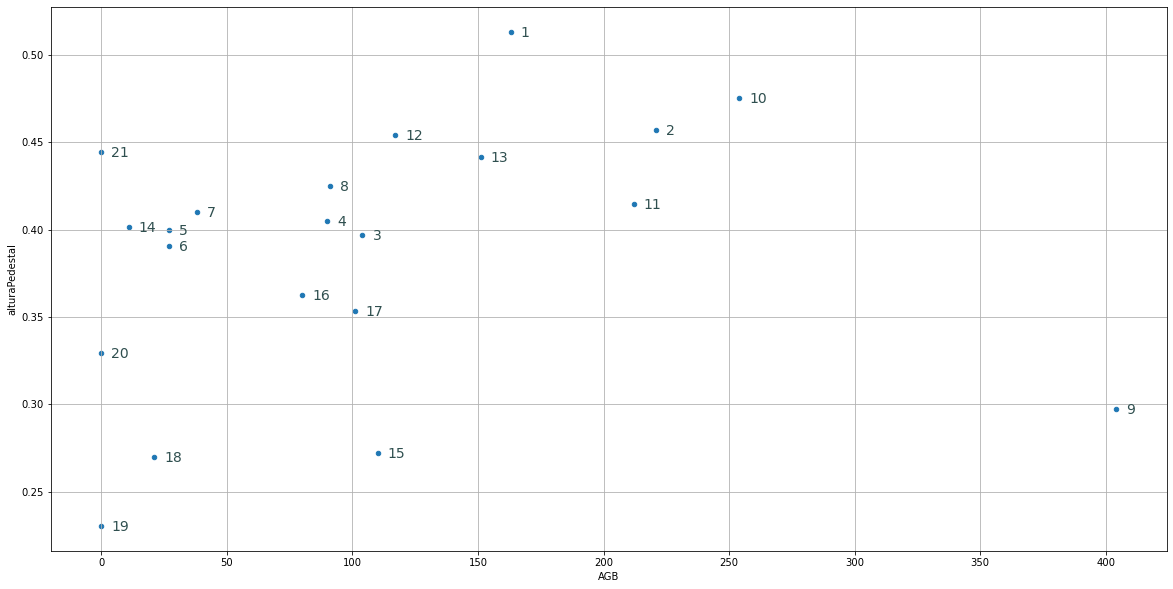

In [54]:
anotattedScatter(dataSAOCOM, 'AGB', 'alturaPedestal')

# dataSAOCOM['alturaPedestal'] = dataSAOCOM['T'].apply(lambda row: alturaPedestal(row))
# dataSAOCOM['corrCopol'] = dataSAOCOM['C'].apply(lambda row: corrCopol(row))
# dataSAOCOM['factorConformidad'] = dataSAOCOM['C'].apply(lambda row: factorConformidad(row))
# dataSAOCOM['gamma'] = dataSAOCOM['C'].apply(lambda row: gamma(row))

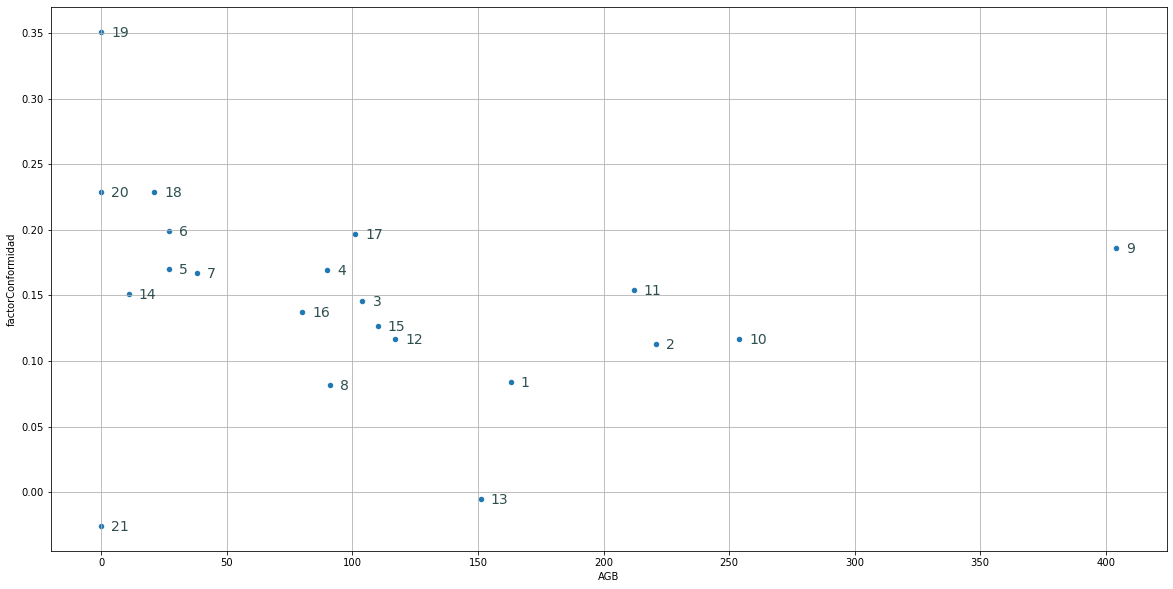

In [55]:
anotattedScatter(dataSAOCOM, 'AGB', 'factorConformidad')


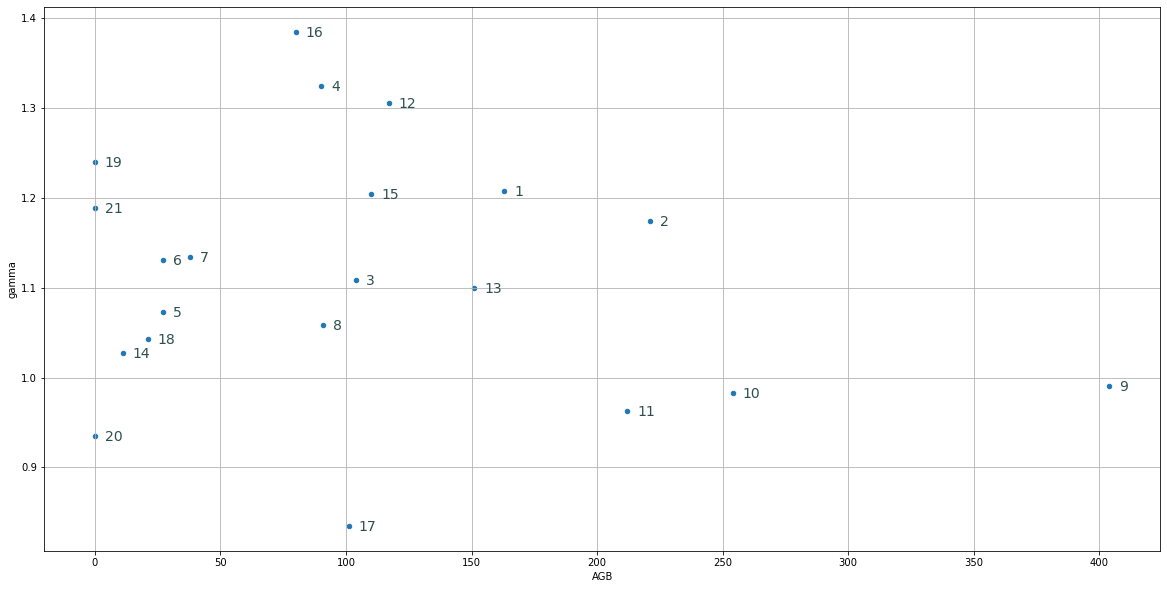

In [56]:
anotattedScatter(dataSAOCOM, 'AGB', 'gamma')

In [ ]:
# Inferencia

In [76]:
RANDOM_SEED = 8927
# rng = np.random.default_rng(RANDOM_SEED)
# size = 200
# true_intercept = 1
# true_slope = 2

# x = np.linspace(0, 1, size)
# # y = a + b*x
# true_regression_line = true_intercept + true_slope * x
# # add noise
# y = true_regression_line + rng.normal(scale=0.5, size=size)

In [ ]:
def errorBarL(df, colListMean, colListStd):
    ''' 
    largo barras de error
    '''
    pos = np.abs(dB(1 + (df[colListStd]/toPower(df[colListMean]))))
    neg = np.abs(dB(1 - (df[colListStd]/toPower(df[colListMean]))))

    return pos, neg

In [206]:
pos, neg = errorBarL(dataSAOCOM.sort_values('C22_corr_dB'), 'C22_corr_dB', 'C22_std')

In [215]:
pos

18    1.431882
19    1.816227
20    1.332645
12    1.423778
15         NaN
13    1.301244
6     1.713124
17         NaN
5     1.436676
7     1.835188
2     1.622547
4     1.454627
11    1.396133
1     1.658346
9     1.265918
16         NaN
3     1.821989
0     2.103721
10    2.139933
14         NaN
8     1.496729
dtype: float64

In [223]:
dataSAOCOM[['C22_corr', 'C22_std']]

,C22_corr,C22_std
0,0.072208,0.045
1,0.064518,0.030
2,0.057400,0.026
3,0.069066,0.036
4,0.057810,0.023
5,0.053559,0.021
6,0.049629,0.024
7,0.057048,0.030
8,0.087490,0.036
9,0.065008,0.022


In [221]:
dB(toPower(dataSAOCOM['C22_corr_dB']) + dataSAOCOM['C22_std']) - dataSAOCOM['C22_corr_dB']

0     2.103721
1     1.658346
2     1.622547
3     1.821989
4     1.454627
5     1.436676
6     1.713124
7     1.835188
8     1.496729
9     1.265918
10    2.139933
11    1.396133
12    1.423778
13    1.301244
14         NaN
15         NaN
16         NaN
17         NaN
18    1.431882
19    1.816227
20    1.332645
dtype: float64

In [224]:
sigmaPorPunto = dB(dataSAOCOM['C22_corr'] + dataSAOCOM['C22_std']) - dataSAOCOM['C22_corr_dB']

In [227]:
sigmaPorPunto[np.isnan(sigmaPorPunto)] = 2

In [228]:
sigmaPorPunto

0     2.103721
1     1.658346
2     1.622547
3     1.821989
4     1.454627
5     1.436676
6     1.713124
7     1.835188
8     1.496729
9     1.265918
10    2.139933
11    1.396133
12    1.423778
13    1.301244
14    2.000000
15    2.000000
16    2.000000
17    2.000000
18    1.431882
19    1.816227
20    1.332645
dtype: float64

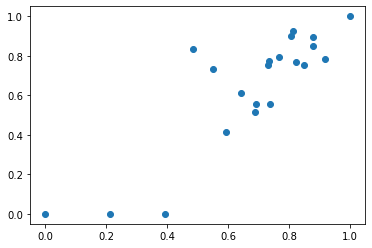

In [229]:
# prepro inferencia

y_ = np.log10(dataSAOCOM.sort_values('C22_corr_dB')['AGB']+1) #dataSAOCOM.AGB.values #np.log10(dataSAOCOM.AGB.values)
x_ = dataSAOCOM.sort_values('C22_corr_dB')['C22_corr_dB']

y_min = y_.min()
y_max = y_.max()
x_min = x_.min()
x_max = x_.max()

y_ = (y_ - y_min) / (y_max - y_min)
x_ = (x_ - x_min) / (x_max - x_min)
x_ = np.sort(x_)

plt.scatter(x_, y_, label="data")

In [230]:

with pm.Model() as model:  # model specifications in PyMC3 are wrapped in a with-statement
    # Define priors
    # sigma = pm.HalfCauchy("sigma", beta=10) #testval=1.0
    # sigmaObs = pm.HalfNormal('sd', sigma=10)
    # sigmaObs = 1.3
    sigmaObs = sigmaPorPunto
    intercept = pm.Normal("Intercept", mu=0, sigma=10)
    x_coeff = pm.Normal("x", mu=0, sigma=10)

    # Define likelihood
    likelihood = pm.Normal("y", mu=intercept + x_coeff * x_, sigma=sigmaObs, observed=y_)

    # Inference!
    # draw 3000 posterior samples using NUTS sampling
    trace = pm.sample(10000, tune=1000) #return_inferencedata=True

    ppc = pm.sample_posterior_predictive(trace, var_names=["y"], samples=100)


/tmp/ipykernel_10512/1386763964.py:15: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(10000, tune=1000) #return_inferencedata=True
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [x, Intercept]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 13 seconds.
The acceptance probability does not match the target. It is 0.5878880423166803, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.
/home/tele/miniconda3/envs/bayes/lib/python3.9/site-packages/pymc3/sampling.py:1689: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


In [231]:
ppc_y = ppc['y']

/home/tele/miniconda3/envs/bayes/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'Intercept'}>],
       [<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'x'}>]], dtype=object)

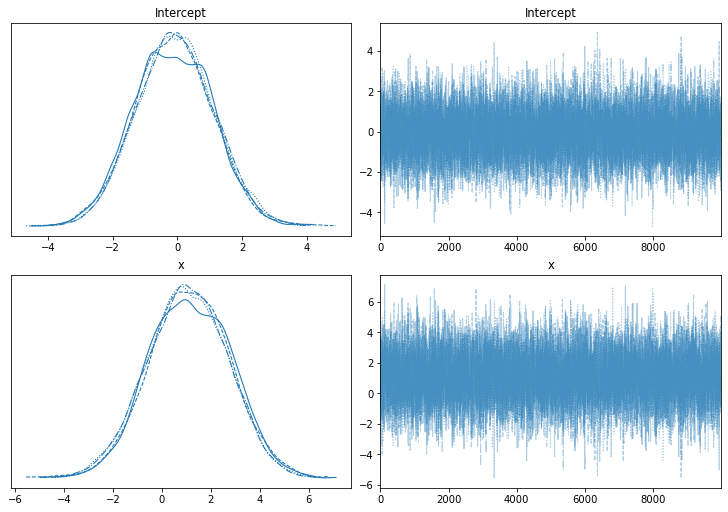

In [232]:
import arviz as az
az.plot_trace(trace, figsize=(10, 7))

/home/tele/miniconda3/envs/bayes/lib/python3.9/site-packages/pymc3/plots/posteriorplot.py:59: DeprecationWarning: The `plot_posterior_predictive_glm` function will migrate to Arviz in a future release. 
Keep up to date with `ArviZ <https://arviz-devs.github.io/arviz/>`_ for future updates.
  warnings.warn(


Text(0, 0.5, 'log(AGB)')

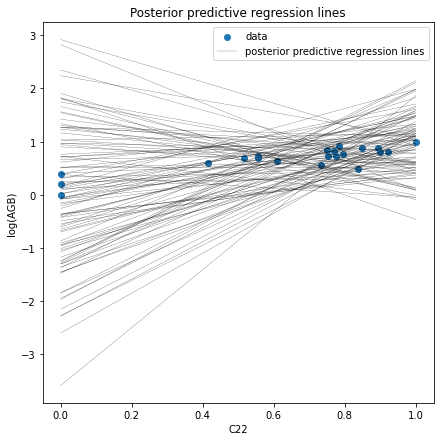

In [233]:
plt.figure(figsize=(7, 7))
# plt.scatter(x_, y, label="data")
plt.scatter(y_, x_, label="data")
pm.plot_posterior_predictive_glm(trace, samples=100, label="posterior predictive regression lines")
# plt.plot(x, true_regression_line, label="true regression line", lw=3.0, c="y")

# for i in range(30):
#     plt.plot(x_, ppc_y[i,:], ':k', alpha = 0.3) #,  label='sample'

plt.title("Posterior predictive regression lines")
plt.legend(loc=0)
plt.xlabel("C22")
plt.ylabel("log(AGB)")

Text(0, 0.5, 'C22')

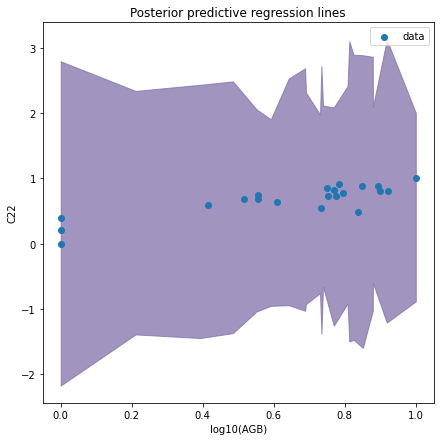

In [234]:
from scipy.stats.mstats import mquantiles

# vectorized bottom and top 2.5% quantiles for "confidence interval"
# qs = mquantiles(p_t, [0.025, 0.975], axis=0)
# plt.fill_between(t[:, 0], *qs, alpha=0.7,
#                  color="#7A68A6")

# plt.plot(t[:, 0], qs[0], label="95% CI", color="#7A68A6", alpha=0.7)

# plt.plot(t, mean_prob_t, lw=1, ls="--", color="k",
#          label="average posterior \nprobability of defect")

# plt.xlim(t.min(), t.max())
# plt.ylim(-0.02, 1.02)
# plt.legend(loc="lower left")
# plt.scatter(temperature, D, color="k", s=50, alpha=0.5)
# plt.xlabel("temp, $t$")

# plt.ylabel("probability estimate")
# plt.title("Posterior probability estimates given temp. $t$");

plt.figure(figsize=(7, 7))
qs = mquantiles(ppc_y, [0.15, 0.85], axis=0)
plt.fill_between(x_, *qs, alpha=0.7, color="#7A68A6")


plt.scatter(y_, x_, label="data")

# for i in range(1):
#     plt.plot(x_, ppc_y[i,:], ':k', alpha = 0.3) #,  label='sample'

plt.title("Posterior predictive regression lines")
plt.legend(loc=0)
plt.xlabel("log10(AGB)")
plt.ylabel("C22")

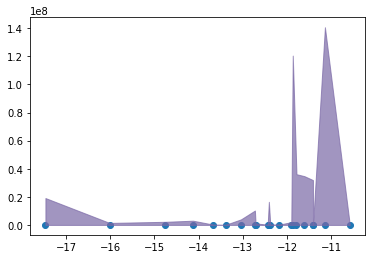

In [235]:
def vuelta(x_, x_min, x_max):
    return x_*(x_max - x_min) + x_min

y_vuelta = 10**vuelta(y_, y_min, y_max)
x_vuelta = vuelta(x_, x_min, x_max)
plt.scatter(x_vuelta, y_vuelta)

qs = mquantiles(10**vuelta(ppc_y, y_min, y_max), [0.05, 0.85], axis=0)
plt.fill_between(x_vuelta, *qs, alpha=0.7, color="#7A68A6")





In [203]:
aux = 10**vuelta(ppc_y, y_min, y_max)

In [204]:
aux

array([[8.08248849e-01, 8.92078025e+00, 1.63380966e+01, ...,
        7.52076067e+01, 2.99984073e+02, 3.89349491e+02],
       [2.23249989e-01, 1.33340063e+00, 1.37300969e+00, ...,
        1.29566144e+02, 1.04084782e+02, 5.21535503e+02],
       [2.44384243e-01, 8.40547609e-01, 1.10323447e+01, ...,
        2.69915390e+01, 5.47383525e+01, 2.28596326e+02],
       ...,
       [6.93765157e-01, 2.37337576e+00, 1.49667935e+02, ...,
        1.87662988e+02, 1.08976924e+03, 6.48299027e+02],
       [7.73755027e-02, 4.15215565e+00, 4.45229140e+00, ...,
        9.17340121e+01, 2.35346927e+02, 3.21752072e+02],
       [6.53671635e-02, 1.93724149e+00, 4.21913314e+00, ...,
        5.93382952e+01, 1.34144329e+02, 2.62217695e+02]])